In [1]:
# import csv
import pandas as pd
from Loading_dataset import load_pd_file
# file_location = input("Enter file location: ")


Enter the file location:  device_features.csv



Fetching data...
Successfully loaded the device_features.csv dataset.

Fetching data...
Successfully loaded the device_features.csv pandas dataset.


In [2]:
file_location = "device_features.csv"
data_file = pd.read_csv(file_location)
print(f"\nFetching data...\nSuccessfully loaded the {file_location} dataset.")
# print(data_file.head)


Fetching data...
Successfully loaded the device_features.csv dataset.


In [42]:
def get_brand_regions():
    # Group data to find the top regions for each brand
    brand_counts = data_file.groupby(['market_regions', 'brand']).size().reset_index(name='counts')
    top_regions_by_brand = brand_counts.groupby('brand').apply(lambda x: x.nlargest(5, 'counts'))
    top_regions_by_brand = top_regions_by_brand.drop(columns='brand').reset_index()

    while True:
        try:
            brand_names = ", ".join(data_file['brand'].unique())
            print(f"Available device brand names in this dataset:\n{brand_names}")

            user_brand = input("Enter the brand you want to see (or 'quit' to exit): ").strip().lower()

            if user_brand == 'quit':
                break  # Exit the loop if the user wants to quit

            user_brand_data = top_regions_by_brand[top_regions_by_brand['brand'].str.lower() == user_brand]

            if not user_brand_data.empty:
                print(f"Top regions for brand: {user_brand}")
                for _, row in user_brand_data.iterrows():
                    print(f"Region: {row['market_regions']} - Count: {row['counts']}")
            else:
                print(f"No data available for brand: {user_brand}")
        except Exception as e:
            print(f"An error occurred: {e}. Please try again.")

# Call the function to get top regions for a brand
get_brand_regions()


Available device brand names in this dataset:
Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand you want to see (or 'quit' to exit):  xiaomi


Top regions for brand: xiaomi
Region: Asia - Count: 41
Region: Asia,Eastern Europe,Europe,Middle East,Southeast Asia,Western Europe - Count: 4
Region: Africa,Asia,Eastern Europe,Europe,Middle East,North America,Southeast Asia,Western Europe - Count: 2
Region: Asia,Southeast Asia - Count: 2
Region: Africa,Asia,Eastern Europe,Europe,Middle East,Southeast Asia,Western Europe - Count: 1
Available device brand names in this dataset:
Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand you want to see (or 'quit' to exit):  exit


No data available for brand: exit
Available device brand names in this dataset:
Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand you want to see (or 'quit' to exit):  quit


In [6]:
def get_valid_input(prompt, valid_options):
    display_options = [option.capitalize() for option in valid_options]
    
    while True:
        user_input = input(prompt).strip().lower()
        if user_input in valid_options:
            return user_input
        print(f"Invalid input. Please choose from the following options: {', '.join(display_options)}")



# Modify get_valid_input function as shown above

def calculate_average_price_for_brand():
    while True:
        try:
            # Get user input for the brand
            brand_name = ", ".join(data_file['brand'].unique())
            print(f"The device brand names in this dataset are:\n {brand_name}")
            brand_input = get_valid_input("Enter the brand (or 'all' for all brands): ", data_file['brand'].str.lower().unique())

            # Get user input for the currency
            currency = ", ".join(data_file['price_currency'].unique())
            print(f"These are the currencies you can choose from: \n {currency}")
            currency_input = get_valid_input("Enter the currency (or 'all' for all currencies): ", data_file['price_currency'].str.lower().unique())

            # Filter the data based on user input
            filtered_data = data_file.copy()  # Create a copy of the original data to avoid modifying it

            if brand_input != 'all':
                filtered_data = filtered_data[filtered_data['brand'].str.lower() == brand_input]

            if currency_input != 'all':
                filtered_data = filtered_data[filtered_data['price_currency'].str.lower() == currency_input]

            if filtered_data.empty:
                print(f"No data found for brand: '{brand_input}' and currency: '{currency_input}'")
            else:
                # Group the filtered data by 'brand' and 'price_currency' and calculate the average price for each combination
                brand_avg_prices = filtered_data.groupby(['brand', 'price_currency'])['price'].mean().round(2).reset_index()

                if not brand_avg_prices.empty:
                    num_rows = 20
                    start_pos = 0
                    end_pos = min(start_pos + num_rows, len(brand_avg_prices))

                    while True:
                        # Display the current set of rows
                        print(brand_avg_prices.iloc[start_pos:end_pos])

                        if end_pos >= len(brand_avg_prices):
                            print("No more rows available.")
                            break

                        user_input = input("Enter 'next' to retrieve the next 20 rows, or 'quit' to exit: ").strip().lower()
                        if user_input == 'next':
                            start_pos += num_rows
                            end_pos = min(start_pos + num_rows, len(brand_avg_prices))
                        elif user_input == 'quit':
                            break

            retry = get_valid_input("Would you like to calculate for another brand/currency (yes/no)? ", ['yes', 'no'])
            if retry != 'yes':
                break
        except Exception as e:
            print(f"An error occurred: {e}. Please try again.")

# Call the function to calculate average prices for a brand
calculate_average_price_for_brand()


The device brand names in this dataset are:
 Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand (or 'all' for all brands):  lg


These are the currencies you can choose from: 
 USD, JPY, MXN, BRL, EUR, INR, GBP, CNY, TWD, THB, CAD, SGD, IDR, AED, TRY, MYR, HKD, AUD, KRW, CHF, ARS, KZT, HUF, PLN, RUB


Enter the currency (or 'all' for all currencies):  usd


  brand price_currency  price
0    LG            USD  187.5
No more rows available.


Would you like to calculate for another brand/currency (yes/no)?  no


In [7]:
def average_mass_brand():
    try:
        # Group the data by 'manufacturer' and calculate the average 'weight_gram'
        manufact_avg_mass = data_file.groupby('manufacturer')['weight_gram'].mean().round(2).reset_index()

        if not manufact_avg_mass.empty:
            num_rows = 20
            start_pos = 0
            end_pos = min(start_pos + num_rows, len(manufact_avg_mass))

            while True:
                # Display the current set of rows
                print("\033[1mAverage Mass by Brand\033[0m")
                print(manufact_avg_mass.iloc[start_pos:end_pos])

                if end_pos >= len(manufact_avg_mass):
                    print("\nNo more rows available.")
                    break

                user_input = input("\nEnter 'next' to view the next 20 rows or 'quit' to exit: ").strip().lower()
                if user_input == 'next':
                    start_pos += num_rows
                    end_pos = min(start_pos + num_rows, len(manufact_avg_mass))
                elif user_input == 'quit':
                    break
                else:
                    print("\nInvalid input. Please enter 'next' or 'quit'.")
        else:
            print("\nNo data available for average mass by brand.")
    except Exception as e:
        print(f"\nAn error occurred: {e}. Please try again.")

# Call the function to calculate average mass by brand
average_mass_brand()


Average Mass by Brand
                        manufacturer  weight_gram
0                   ASUSTeK Computer       221.37
1                    BBK Electronics       201.00
2          FIH Precision Electronics       203.75
3                            Foxconn       315.15
4                  Hon Hai Precision       144.00
5                     LG Electronics       204.08
6                             Lenovo       216.98
7                     Luxshare iTech        31.60
8                          Microsoft       284.00
9          Rising Stars Mobile India       196.50
10               Samsung Electronics       205.64
11                             Sharp       209.50
12  Shenzhen TINNO Mobile Technology       198.84
13                              Sony       189.36
14                   Wingtech Mobile       204.50
15                            Xiaomi       190.55
16                               ZTE       195.50

No more rows available.


In [40]:
def get_cheapest_prices_and_recommendations():
    while True:
        try:
            brand_names = ", ".join(data_file['brand'].unique())
            print(f"Available device brand names in this dataset:\n{brand_names}")

            user_brand = input("Enter the brand to find the top 5 cheapest prices (or enter 'exit' to quit): ").strip().lower()

            if user_brand == 'exit':
                break  # Exit the loop if the user wants to quit

            filtered_data = data_file[data_file['brand'].str.lower() == user_brand]

            if not filtered_data.empty:
                top_5_cheapest = filtered_data.nsmallest(5, 'price')[['oem_id', 'price']]
                print(f"Top 5 cheapest prices for brand: {user_brand}")
                for _, row in top_5_cheapest.iterrows():
                    print(f"OEM ID: {row['oem_id']} - Price: {row['price']}")

                # Set a flag to control the loop
                done = False

                while not done:
                    print()
                    print("Now, you can enter the OEM ID of one of these devices to check for recommendations based on the price-performance ratio.")
                    user_id_input = input("Enter the OEM ID (or 'exit' to return to brand selection): ")

                    if user_id_input == 'exit':
                        done = True  # Exit the inner loop
                    else:
                        selected_device = filtered_data[filtered_data['oem_id'] == user_id_input]

                        if not selected_device.empty:
                            brand = selected_device['brand'].values[0]
                            price = selected_device['price'].values[0]
                            performance_score = selected_device['Performance_Score'].values[0]
                            price_performance_ratio = selected_device['Price_Performance_Ratio'].values[0]

                            print()
                            print(f"For this {brand} brand and OEM ID of {user_id_input} with a price of {price}:")
                            print(f"The Performance score of the device is {performance_score:.2f}")
                            print(f"The higher the number (up to {filtered_data['Performance_Score'].max():.2f}) the better the performance of the device.")
                            print(f"The lower the number (down to {filtered_data['Performance_Score'].min():.2f}) the less the performance of the device.")
                            print("---------------------------------------------------------------------------------------------------------------------")
                            print(f"The Price Performance Ratio for the device is {price_performance_ratio:.2f}")
                            print(f"The higher the number (up to {filtered_data['Price_Performance_Ratio'].max():.2f}) the better the performance relative to the price.")
                            print(f"The closer it is to (down to {filtered_data['Price_Performance_Ratio'].min():.2f}), the less the performance of the device for its price.")

                            if price_performance_ratio >= 5:  # Good buy threshold is 5.0
                                print("This is a good buy! It offers great performance for its price.")
                            else:
                                print("Based on the price performance ratio. \nPlease consider other options. It may not provide the best value for your money.")
                        else:
                            print(f"No device with OEM ID {user_id_input} found in the dataset.")
            else:
                print(f"No data available for brand: {user_brand}")
        except Exception as e:
            print(f"An error occurred: {e}. Please try again.")

# Call the function to get the cheapest prices and recommendations
get_cheapest_prices_and_recommendations()


Available device brand names in this dataset:
Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand to find the top 5 cheapest prices (or enter 'exit' to quit):  samsung


Top 5 cheapest prices for brand: samsung
OEM ID: F711BZEBEUB - Price: 109.0
OEM ID: A025VZKAVZW - Price: 149.99
OEM ID: A047FZKUEUB - Price: 159.0
OEM ID: M127FZGVEUE - Price: 159.0
OEM ID: A025UZKAUSC - Price: 159.99

Now, you can enter the OEM ID of one of these devices to check for recommendations based on the price-performance ratio.


Enter the OEM ID (or 'exit' to return to brand selection):  F711BZEBEUB



For this Samsung brand and OEM ID of F711BZEBEUB with a price of 109.0:
The Performance score of the device is 1164.80
The higher the number (up to 1547.60) the better the performance of the device.
The lower the number (down to 728.60) the less the performance of the device.
---------------------------------------------------------------------------------------------------------------------
The Price Performance Ratio for the device is 10.69
The higher the number (up to 10.69) the better the performance relative to the price.
The closer it is to (down to 0.00), the less the performance of the device for its price.
This is a good buy! It offers great performance for its price.

Now, you can enter the OEM ID of one of these devices to check for recommendations based on the price-performance ratio.


Enter the OEM ID (or 'exit' to return to brand selection):  exit


Available device brand names in this dataset:
Samsung, Motorola, Xiaomi, Nokia, Sony, Asus, Lenovo, T-Mobile, BBK, Apple, ZTE, Microsoft, LG, Sharp


Enter the brand to find the top 5 cheapest prices (or enter 'exit' to quit):  exit


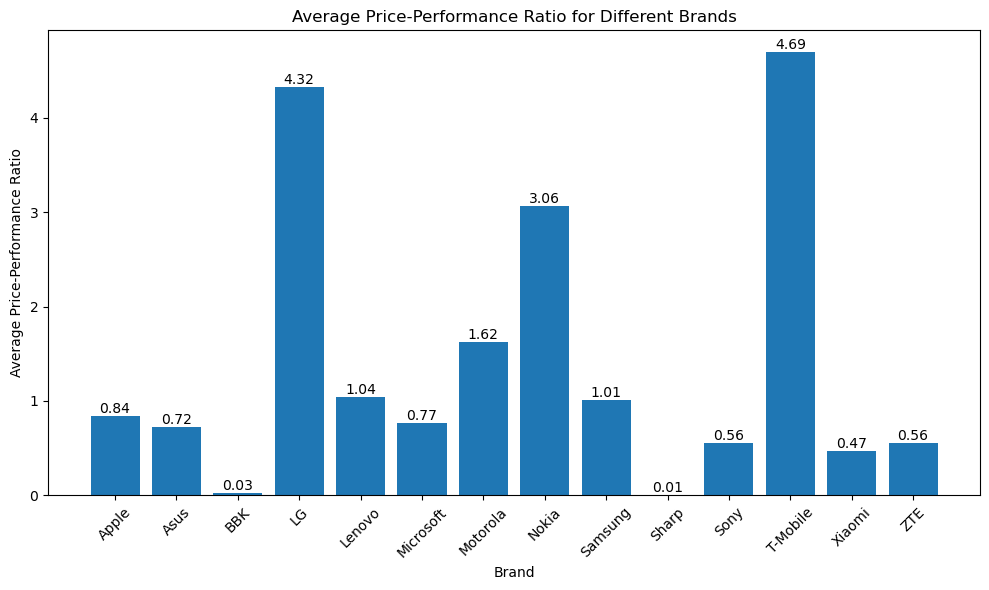

In [11]:
import matplotlib.pyplot as plt
df = data_file
def average_ppr():
    # Create a bar chart to visualize the Price-Performance Ratio for all devices
    # Group by brand and calculate the average Price-Performance Ratio
    average_ppr_by_brand = df.groupby('brand')['Price_Performance_Ratio'].mean().reset_index()
    # Create a bar chart to visualize the average Price-Performance Ratio for different brands
    plt.figure(figsize=(10, 6))
    plt.bar(average_ppr_by_brand['brand'], average_ppr_by_brand['Price_Performance_Ratio'])
    plt.xlabel('Brand')
    plt.ylabel('Average Price-Performance Ratio')
    plt.title('Average Price-Performance Ratio for Different Brands')
    plt.xticks(rotation=45)

    # Display the values for the bars
    for index, value in enumerate(average_ppr_by_brand['Price_Performance_Ratio']):
        plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

    plt.tight_layout()

    # Save the chart to an image file (optional)
    plt.savefig("average_price_performance_chart.png")

    # Show the chart
    plt.show()
average_ppr()

The Performance Score is a value calculated based on various specifications of the devices, such as CPU clock speed, RAM capacity, and non-volatile memory capacity. A higher Performance Score indicates a better overall performance of the device.
*The Price-Performance Ratio is a measure of how well a device performs relative to its price. It is calculated by dividing the Performance Score by the price. A higher Price-Performance Ratio suggests that a device offers better performance for its cost.